Epoch 0, Error: 0.276656
Epoch 1000, Error: 0.250002
Epoch 2000, Error: 0.249978
Epoch 3000, Error: 0.249938
Epoch 4000, Error: 0.249827
Epoch 5000, Error: 0.249307
Epoch 6000, Error: 0.242375
Epoch 7000, Error: 0.077822
Epoch 8000, Error: 0.013760
Epoch 9000, Error: 0.006527

Final Results:
Input -> Target | Predicted -> Rounded
----------------------------------------
[0 0] -> 0 | 0.0676 -> 0
[0 1] -> 1 | 0.9406 -> 1
[1 0] -> 1 | 0.9406 -> 1
[1 1] -> 0 | 0.0704 -> 0

Accuracy: 100.0%


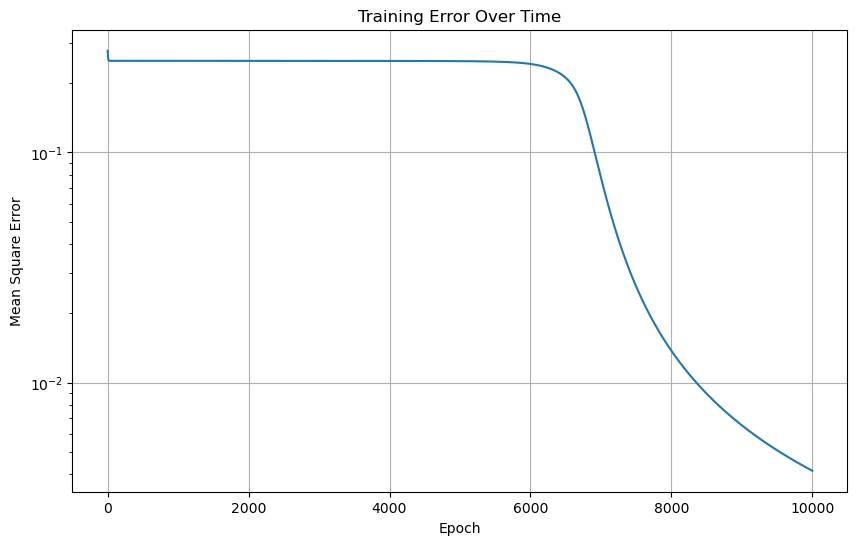

In [6]:
import numpy as np

class XORNeuralNetwork:
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1))
        self.bias_hidden = np.random.uniform(-1, 1, (1, 2))
        self.bias_output = np.random.uniform(-1, 1, (1, 1))
        self.error_history = []

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_input)
        return self.predicted_output

    def backward_pass(self, X, y, predicted_output):
        m = X.shape[0]
        output_error = y - predicted_output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate / m
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate / m
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m

    def train(self, X, y, epochs=10000, print_every=1000):
        for epoch in range(epochs):
            predicted_output = self.forward_pass(X)
            mse = np.mean((y - predicted_output) ** 2)
            self.error_history.append(mse)
            self.backward_pass(X, y, predicted_output)
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Error: {mse:.6f}")

    def predict(self, X):
        return self.forward_pass(X)

    def print_results(self, X, y):
        predictions = self.predict(X)
        print("\nFinal Results:")
        print("Input -> Target | Predicted -> Rounded")
        print("-" * 40)
        for i in range(len(X)):
            predicted_val = predictions[i][0]
            rounded_val = round(predicted_val)
            print(f"{X[i]} -> {y[i][0]:.0f} | {predicted_val:.4f} -> {rounded_val}")
        rounded_predictions = np.round(predictions)
        accuracy = np.mean(rounded_predictions == y) * 100
        print(f"\nAccuracy: {accuracy:.1f}%")

def main():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    nn = XORNeuralNetwork(learning_rate=1.0)
    nn.train(X, y, epochs=10000, print_every=1000)
    nn.print_results(X, y)

    plt.figure(figsize=(10,6))
    plt.plot(nn.error_history)
    plt.title("Training Error Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error")
    plt.yscale("log")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

